# Assignment 1

### Load libraries

In [1]:
import pandas as pd
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
import random as ran
import collections
import math
import functools
import operator

# Part 1: Binning degree distributions

 ### 1.1 Binning real numbers
 

* _Let's do a gentle start and use the random library generate 5000 data points from a Gaussian distribution with  𝜇=2  and  𝜎=0.125 ._

In [2]:
mu = 2
sigma = 0.125

temp = np.random.normal(2,0.125, 5000)
    
print("Checking the length of the list \"temp\" to see that is has 5000 entries. \n Length of numberes: {}".format(len(temp)))

Checking the length of the list "temp" to see that is has 5000 entries. 
 Length of numberes: 5000


* _Now, let's use `numpy.histogram` to bin those number into 10 bins. What does the `numpy.histogram` function return? Do the two arrays have the same length?_

In [3]:
hist_np = np.histogram(temp,bins=10)
print(" Density array: {} \n Edge array: {} ".format(hist_np[0],hist_np[1]))
print(80*"-")
print(" Length of the first array: {}\n Length of the secong array: {}".format(len(hist_np[0]), len(hist_np[1])))

 Density array: [   2   46  252  888 1517 1384  690  197   22    2] 
 Edge array: [1.50911315 1.61039182 1.71167049 1.81294916 1.91422783 2.0155065
 2.11678517 2.21806384 2.31934251 2.42062118 2.52189984] 
--------------------------------------------------------------------------------
 Length of the first array: 10
 Length of the secong array: 11


* What does numpy.histogram return
  * The first array shows the "density/weight" of the different bins. In other words, how many of the  entries of the total entries are in the corresponding bin. 
  * The second array shows the bins edges, which dictates that the values in the first bin has values in the range 1.54 to 1.63 but excluding 1.63, except for the last two "edge" values where the value range is from 2.24 to and including 2.33
* Does the output array have the same length? 
  * No the arrays have different length, the array which shows the "density" has the length of 10, where the array which contains the edges has a length of 11.

 * _* Then we use `matplotlib.pyplot.plot` to plot the binned data. You will have to deal with the fact that the counts- and bin-arrays have different lengths._

In [4]:
x = [hist_np[0], 0.5*(hist_np[1][1:]+hist_np[1][:-1])]

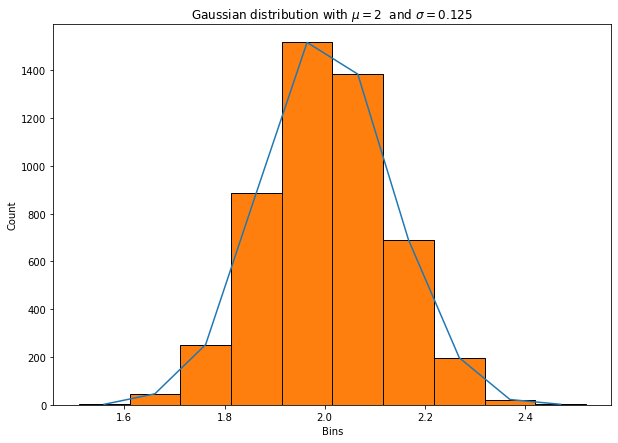

In [5]:
fig = plt.figure(figsize =(10, 7)) 
plt.plot(x[1], x[0])
plt.ylabel('Count')
plt.xlabel('Bins')
plt.hist(temp, bins=10, edgecolor='black')
plt.title('Gaussian distribution with $\mu=2$  and $\sigma=0.125$')

plt.show()

Above figure shows the Gaussian distribution plotted, with an expected high concentration of occurances around the mean.

* _Explain how you deal with this problem and why_

Due to the `numpy.histogram` combining the last bin, an average of every interval is computed (i.e. the center of each bin), to get an even length of the two arrays, enabling the plotting. 

### 1.2 Bining Integers 

* _Now we'll generate a bunch of integers and set the bin boundaries manually. This time, let's grab data from a Poisson distribution. As it turns out `numpy` also has some convenient random number generators. Use `numpy.random.poisson` to generate 5000 numbers drawn from a Poisson distribution characterized by $\lambda = 10$. Find the maximum and minimum value of your 5000 random numbers._

In [6]:
pois = np.random.poisson(10,5000)
print("The minimum value of the poisson distribution: {} \nThe maximum value of the poisson distribution: {}".format(np.min(pois), np.max(pois)))

The minimum value of the poisson distribution: 2 
The maximum value of the poisson distribution: 26


* _Create a vector $v$ that results in a binning that puts each integer value in its own bin and where the first bin contains the minimum number you found above, and the last bin contains the maximum number (you may want to think about how `numpy.histogram` deals with the smallest an largest value in particular; is it correct to set the first entry of $v$ to be equal to the smallest value you observe and the last entry of $v$ to be the highest value observed?)._ 


In [7]:
#Creating a vector that will bin the values from smallest to largest in their own bins.
v = np.arange(min(pois), max(pois)+1)
print("Unique bin values: \n{}".format(v))

Unique bin values: 
[ 2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25
 26]


In [8]:
#using numpy.histogram
hist_pois = np.histogram(pois, bins=v)
print("np.histogram bin counts: \n{} \nnp.histogram bins: \n{}".format(hist_pois[0],hist_pois[1]))
print(110*"-")
print("Sum over bin counts: {}, which equals the number of data points created".format(sum(hist_pois[0])))

np.histogram bin counts: 
[ 12  42  84 181 305 450 588 593 642 556 490 347 277 201 114  59  35  11
   5   3   3   1   0   1] 
np.histogram bins: 
[ 2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25
 26]
--------------------------------------------------------------------------------------------------------------
Sum over bin counts: 5000, which equals the number of data points created


To overcome the the binning of numpy.histogram, the an average of the "bins" are calculated, inorder to to have the lists the same lenghts. The minimum and still corresponds to the first bin, but "shifted" a half, and the same for the maximum value. 

In [9]:
#Averaging bins
x = [hist_pois[0], 0.5*(hist_pois[1][1:]+hist_pois[1][:-1])]
x

[array([ 12,  42,  84, 181, 305, 450, 588, 593, 642, 556, 490, 347, 277,
        201, 114,  59,  35,  11,   5,   3,   3,   1,   0,   1]),
 array([ 2.5,  3.5,  4.5,  5.5,  6.5,  7.5,  8.5,  9.5, 10.5, 11.5, 12.5,
        13.5, 14.5, 15.5, 16.5, 17.5, 18.5, 19.5, 20.5, 21.5, 22.5, 23.5,
        24.5, 25.5])]

* Use a bar chart (matplotlib.pyplot.bar) to plot the distribution

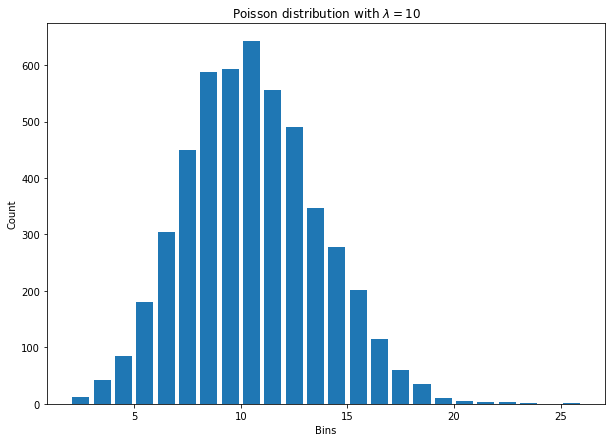

In [10]:
fig = plt.figure(figsize =(10, 7))
plt.bar(x[1], x[0]) 
plt.ylabel('Count')
plt.xlabel('Bins')
plt.title('Poisson distribution with $\lambda = 10$')
plt.show()

Above figure shows the poisson distribution, where an expected high concentration is around lambda.

### 1.3 Binning and plotting degree distributions

* _Let's generate the Erdös-Renyi (ER) network which has a degree distribution that matches the Poisson distribution above. First we have to figure out which values the ER parameters (N and p) should assume. It's easy to see that  𝑁=5000 , but how do you find  𝑝 ?_

We know that the number of _nodes_ is 5000 and the _average degree_ is 10. Therefore we can find probability _p_ by 
$$p = \frac{⟨k⟩}{(N-1)} = \frac{10}{(5000-1)}$$

In [11]:
N = 5000; k = 10; p = k/(N-1)
print("The probability is: {}".format(round(p, 4)))

The probability is: 0.002


Now we can generate the ER network with the above ER parameters

In [12]:
G= nx.erdos_renyi_graph(N,p) 

* _Use `networkx` to create the graph and extract the degree distribution._

We extract the degree distribtuion using `degree()` function from NetworkX inside a list comprehension looping over each node.

In [13]:
#Extracting the degrees and plotting them 
degree_sequence = sorted([d for n, d in G.degree()], reverse=True)  # degree sequence
degreeCount = collections.Counter(degree_sequence)
deg, cnt = zip(*degreeCount.items())

* _Create a nice bar plot of the degree distribution_

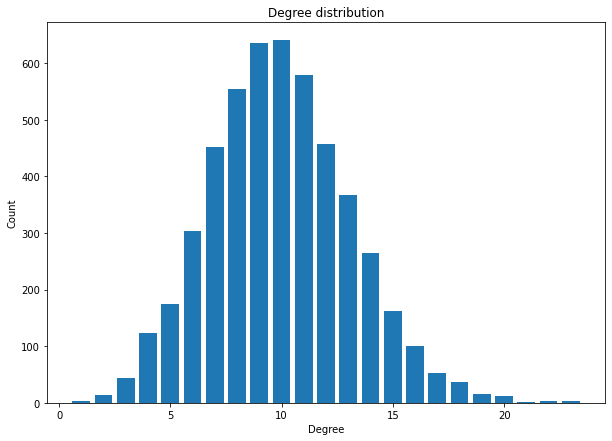

In [14]:
#Plotting the degrees
fig = plt.figure(figsize =(10, 7))
plt.bar(deg, cnt)
plt.title("Degree distribution")
plt.ylabel("Count")
plt.xlabel("Degree")
plt.show()

As we can see from the plot, the degree distriution is quite similar to a poisson distribution, plottet in part 1.2.

# Part 2: Random networks and plotting in networkx

### 2.1 NS Exercise 3.1
In your notebook, work through NS exercise 3.1 ('Erdős-Rényi Networks'). The exercise can be found in Section 3.11: Homework.

In [15]:
N = 3000; p = pow(10,-3);

* _What is the expected number of links, 〈L〉?_

In [16]:
L = (p*N*(N-1))/2
print("Average number of links in the network: {}".format(L))

Average number of links in the network: 4498.5


* _In which regime is the network?_

In [17]:
print("〈k〉= {}, \t Log(N) = {}".format(p*(N-1),np.round(np.log(N),4)), "\n")
print("Log(N) >〈k〉> 1, thus the network is in the Supercritical regime.")
print("\n")

〈k〉= 2.999, 	 Log(N) = 8.0064 

Log(N) >〈k〉> 1, thus the network is in the Supercritical regime.




* _Calculate the probability pc so that the network is at the critical point_

For a network to be at the critical point,〈k〉must be equal to 1, meaning
$$p_c = \frac{1}{(N-1)} = p_c = \frac{1}{(3000-1)}$$

In [18]:
K_1 = 1 
p_critical = K_1/(N-1)
print("Thus the calculated probabilty is equal to {}".format(np.round(p_critical,4)))

Thus the calculated probabilty is equal to 0.0003


* _Calculate the number of nodes $N_{cr}$ so that the network has only one component_

For a Network to only have one component, ⟨𝑘⟩ must be bigger than ln(N). We know that $ln(N)=8.0064$, thus  we set $⟨𝑘⟩ equal to 9 and find the number of corresponding nodes

$$ ⟨𝑘⟩ = p(N-1) => N = \frac{⟨𝑘⟩}{p} + 1 $$

In [19]:
# All component are absorbed the the giant Network when k>ln(n)
N = 3000
k_ln = np.round(np.log(N),4)
print("〈k〉has to be larger than {}, inorder for the network to only have one component".format(k_ln))
#The number of nodes can now be found 
k_new = 9
N_one = ((k_new/p)+1) # a node is added so k will be above K_ln
print("\n Therefore the number of nodes must be at least {}".format(N_one)) 

〈k〉has to be larger than 8.0064, inorder for the network to only have one component

 Therefore the number of nodes must be at least 9001.0


* _Calculate the average degree $K_{cr}$ for the network above_

The average degree can be found using the following formula
$$〈k〉= p(N-1)$$

In [20]:
k_cr = p*(N_one-1)
print("The average degree of the network is {}".format(k_cr))

The average degree of the network is 9.0


* _Average distance between nodes_

In [21]:
d = np.log(N_one)/np.log(k_new)
print("The average distance between two random nodes is {}".format(d) )

The average distance between two random nodes is 4.143905477470828


* _Calculate the degree distribution $p_k$ of this network_

The degree distribution can be found using the following formula
$$p_k = e^{-〈k〉} \frac{〈k〉^{〈k〉}}{k!}$$

In [22]:
p_k = np.exp(-k_new)*(pow(k_new,k_new)/math.factorial(k_new))
print("Distribution degree of the network is {}".format(np.round(p_k,4)))

Distribution degree of the network is 0.1318


### 2.2 Paths

* _Plot a random network with 200 nodes and an average degree of 1.5._

The probability is:  0.007537688442211055


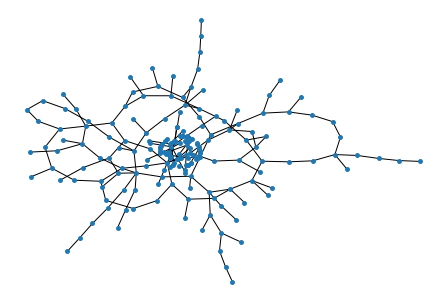

In [23]:
n_1 = 200
k_1 = 1.5 
p_1 = k_1/(n_1-1)
print("The probability is: ",p_1)
G_1 = nx.erdos_renyi_graph(n_1,p_1, directed=False)
# Drawing the graph
nx.draw_kamada_kawai(G_1, node_size=15) 
plt.show()

Above the random Erdos Renyi network with 200 nodes is shown. The probabilty for the network is calculated to be  0.0075. A cluster of nodes can be seen in the middle, from where it gets "thinner" the further out it goes. 

* _Extract the Giant Connected Component, GCC._

In [24]:
GCC = sorted(nx.connected_components(G_1),key=len,reverse=True)
#Sortinf the connected_component puts the largest component in top, there for the first set is chossen. 
print("Number of nodes in the GCC network: {}".format(len(GCC[0])))

Number of nodes in the GCC network: 121


* _Choose a node at random from the GCC_

In [25]:
#The first list in the GCC contains all nodes, which is not picked. The largest GCC that does not contain all nodes is choosen. 
random = ran.choice(list(GCC[0]))
print("Random node chossen: {}".format(random))

Random node chossen: 27


* _Find all nodes that are precisely 2 steps away from that node_

In [26]:
G_11 = G_1.subgraph(GCC[0]).copy()
nodes = nx.single_source_shortest_path_length(G_11,random,cutoff=2)
nodes_2 = []
for i in nodes:
    if nodes[i] == 2:
        nodes_2.append(i)
    else:
        continue
print("Nodes that are 2 steps away: {}".format(nodes_2))

Nodes that are 2 steps away: [199, 114, 147, 91]


* _Plot the GCC with the following choice of colors. Starting node black ("#000000"). The nodes 2 steps away red ("#ff0000"). All other nodes blue ("#A0CBE2"). Again, I suggest using networkx.draw() and reading the documentation carefully find out how to color individual nodes._

In [27]:
#Converting the nodes-set to a dictionary, assigning the same color to them all 
res = dict.fromkeys(GCC[0], "#A0CBE2")
res.update({random: "#000000"}) # assigning the random node the black color
for i in nodes_2: # looping through the dictionary, assigning the "red" color to the nodes 2 steps away. 
    res.update({i: "#FF0000"})

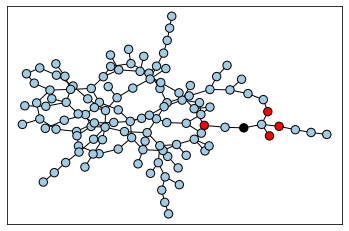

In [28]:
pos = nx.kamada_kawai_layout(G_11) #choosing layout
nodes = nx.draw_networkx_nodes(G_11, pos,node_size=70, node_color=res.values())#defining nodes
nodes.set_edgecolor('#000000') #setting node-edge color
nx.draw_networkx_edges(G_11, pos) #adding edges
plt.show()

In the plot above, the largest component of the randon 200 node network is seen. The black node node is the random choosen node, and the red nodes are the nodes that are exaclty 2 steps away from the black node. 

# Part 3: The Watts-Strogatz model

### 3.1 

* _Generate 3 graphs with 500 nodes each, average degree = 4, and rewiring probablity p=0,0.1,and1._

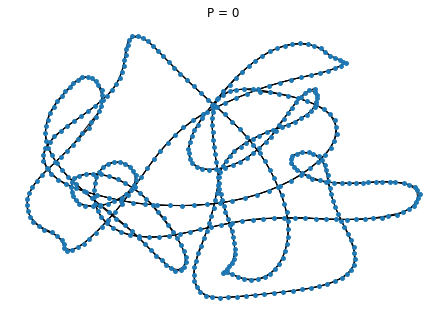

In [29]:
G1 = nx.watts_strogatz_graph(500,4,0)
nx.draw(G1, node_size=15)
plt.title("P = 0")
plt.show()

Above figure shows as expected a ring of nodes, each node being connected to their immediate and next neighbors.

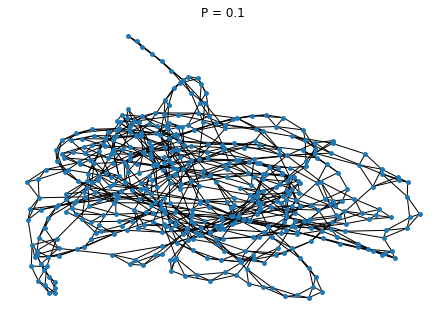

In [30]:
G2 = nx.watts_strogatz_graph(500,4,0.1)
nx.draw(G2, node_size=15)
plt.title("P = 0.1")
plt.show()

Above figure shows how a network with small p maintains high clustering but the random long-range links can drastically decrease the distances between the nodes.

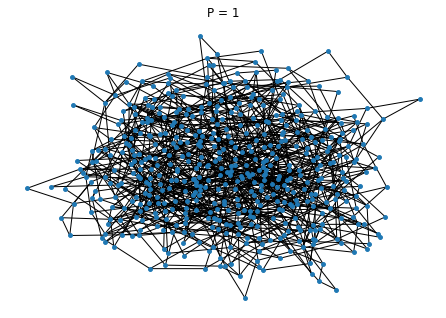

In [31]:
G3 = nx.watts_strogatz_graph(500,4,1)
nx.draw(G3, node_size=15)
plt.title("P = 1")
plt.show()

For above figure all links have been rewired, so the network turns into a random network.

* _Calculate the average shortest path length ⟨d⟩ for each one_

In [32]:
avg_G1= nx.average_shortest_path_length(G1)
print("the average shortest path length ⟨d⟩ for graph 1 is : ", avg_G1)

the average shortest path length ⟨d⟩ for graph 1 is :  62.875751503006015


In [33]:
avg_G2= nx.average_shortest_path_length(G2)
print("the average shortest path length ⟨d⟩ for graph 2 is : ", avg_G2)

the average shortest path length ⟨d⟩ for graph 2 is :  7.849370741482966


In [34]:
avg_G3= nx.average_shortest_path_length(G3)
print("the average shortest path length ⟨d⟩ for graph 3 is : ", avg_G3)

the average shortest path length ⟨d⟩ for graph 3 is :  4.748264529058116


* _Describe what happens to the network when p=1_

The average degree and the average shortest path length when p = 1 are close to each other. 

In [35]:
print ("The average distance <d> =", np.log(500) / np.log(4))

The average distance <d> = 4.4828921423310435


### 3.2 

* _Let's investigate this behavior in detail. Generate 50 networks with N=500, ⟨k⟩=4, for each of p={0,0.01,0.03,0.05,0.1,0.2}. Calculate the average of ⟨d⟩ as well as the standard deviation over the 50 networks, to create a plot that shows how the path length decreases very quickly with only a little fraction of re-wiring. Use the standard deviation to add errorbars to the plot. My version of the plot is below (since a picture's worth 1000 words)_

In [36]:
#define the values
p = [0,0.01,0.03,0.05,0.1,0.2]
probs = len(p)
nets = 50
N = 500
k = 4
avg_G = np.zeros((len(p),50))

In [37]:
for prob in range(probs):
    for net in range(nets):
        G = (nx.watts_strogatz_graph(N,k,p[prob]))
        avg_G[prob,net] = nx.average_shortest_path_length(G)

In [38]:
mean_G = np.mean(avg_G,axis=1)

std_G =np.std(avg_G,axis=1)

print("The average of ⟨d⟩ :  ", mean_G)
print("The standard deviation over the 50 networks : ",std_G)

The average of ⟨d⟩ :   [62.8757515  23.42855182 13.19247968 10.35054188  7.691318    6.10339255]
The standard deviation over the 50 networks :  [7.10542736e-15 4.26579165e+00 1.27405637e+00 6.73382667e-01
 2.58122651e-01 1.09880983e-01]


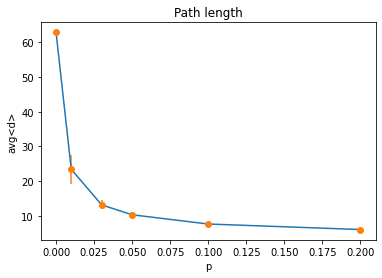

In [39]:
plt.plot(p, mean_G,) 
plt.errorbar(p, mean_G, 
             yerr = std_G, 
             fmt ='o')
plt.xlabel("p")
plt.ylabel("avg<d>")
plt.title("Path length")
plt.show()

Above figure shows the average of ⟨d⟩ for p:{0,0.01,0.03,0.05,0.1,0.2}.

# Part 4:  The Barabasi-Albert Model

* _Create a 100 node BA network using a BA model that you've coded on your own (so don't use the built-in NetworkX function, but the one you created during week 3). And plot it using NetworkX._



In [40]:
G_BA_100 = nx.Graph()
G_BA_100.add_edge(1,2)
all_nodelinks = functools.reduce(operator.concat, G_BA_100.edges)
rand_item = all_nodelinks[ran.randrange(len(all_nodelinks))]

In [41]:
ii = 0
for ii in range (100):
    all_nodelinks = functools.reduce(operator.concat, G_BA_100.edges)
    rand_item = all_nodelinks[ran.randrange(len(all_nodelinks))]
    G_BA_100.add_edge(ii,rand_item)

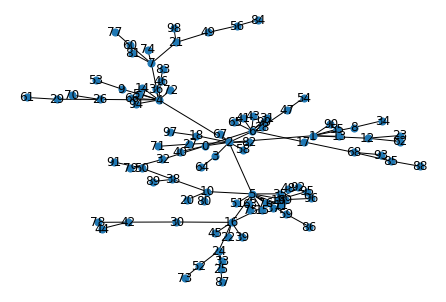

In [42]:
nx.draw(G_BA_100, with_labels = True, node_size=50)
plt.show()

Above figure shows the BA network model of 100 nodes. Here it's clear that a few nodes have a higher degree than the rest of the network.

* _Now create a 5000 node network._

In [43]:
G_BA = nx.Graph()
G_BA.add_edge(1,2)
all_nodelinks = functools.reduce(operator.concat, G_BA.edges)
rand_item = all_nodelinks[ran.randrange(len(all_nodelinks))]

In [44]:
ii = 0
for ii in range (5000):
    all_nodelinks = functools.reduce(operator.concat, G_BA.edges)
    rand_item = all_nodelinks[ran.randrange(len(all_nodelinks))]
    G_BA.add_edge(ii,rand_item)

* _What's the maximum and minimum degree?_

In [45]:
#Extracting the degrees and plotting them 
degree_sequence = sorted([d for n, d in G_BA.degree()], reverse=True)  # degree sequence
degreeCount = collections.Counter(degree_sequence)
deg, cnt = zip(*degreeCount.items())

print("Minumum Degree: {}\n Maximum Degree {}".format(min(deg),max(deg)))

Minumum Degree: 1
 Maximum Degree 209


* _Now, bin the degree distribution, for example using `numpy.histogram`. Plot the distribution. Plot it with both linear and log-log axes._

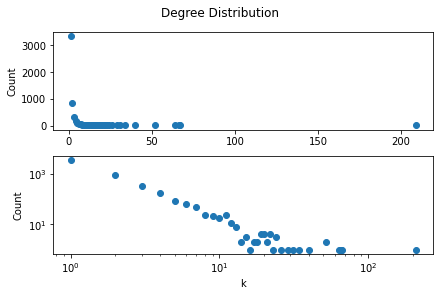

In [46]:
fig, (ax1, ax2) = plt.subplots(ncols=1, nrows=2, constrained_layout=True)
fig.suptitle("Degree Distribution")
ax1.scatter(deg, cnt)
ax2.scatter(deg,cnt)

ax2.set_xscale('log')
ax2.set_yscale('log')

ax1.set_ylabel('Count')
ax2.set_ylabel('Count')
ax2.set_xlabel('k')
plt.show()

Above figure shows the degree distribution of the BA network of 5000 nodes. As expected, the network is composed around a few highly "popular" nodes.

# Part 5:  Power-laws and the friendship paradox

* _Pick a node _i_ at random (e.g. use random.choice)_

In [47]:
rand_node = ran.choice(list(G_BA.nodes()))
print("The random node {} has the degree {}.".format(rand_node,G_BA.degree(rand_node)))

The random node 3871 has the degree 1.


* _Find i's neighbours and calculate their average degree_

In [48]:
neighbours = nx.single_source_shortest_path_length(G_BA,rand_node,cutoff=1)
print(neighbours)

{3871: 0, 993: 1}


In [49]:
d_n = [G_BA.degree(n) for n in list(neighbours.keys())[1:]]

In [50]:
avg_d_n = sum(d_n)/len(d_n)
print("The average degree is ", avg_d_n)

The average degree is  3.0


* _Compare the two numbers to chechk if it's true that i's friends (on average) have more friends than i._

In [51]:
if G_BA.degree(rand_node) > avg_d_n:
  print("The friendship paradox is true, and therefore, i's freiends (on average) don't have more freinds than i.")
else:
  print("The friendship paradox is false, and therefore, i's freiends (on average) have more freinds than i.")

The friendship paradox is false, and therefore, i's freiends (on average) have more freinds than i.


* _Do this 1000 times. How many out of those 1000 is freindship paradox true?_

In [52]:
cnt_true = 0
cnt_false = 0
for i in range(1000):
  rand_node = ran.choice(list(G_BA.nodes()))

  neighbours = nx.single_source_shortest_path_length(G_BA,rand_node,cutoff=1)

  d_n = [G_BA.degree(n) for n in list(neighbours.keys())[1:]]
  avg_d_n = sum(d_n)/len(d_n)

  if G_BA.degree(rand_node) > avg_d_n:
    cnt_true += 1
  else:
    cnt_false += 1

In [53]:
print("The friendship paradox is true {}% of the time".format((cnt_true/1000)*100))

The friendship paradox is true 12.3% of the time


* _Compare to the ER network of the same size an same P. What are differences? Explain in your own words. Hint: To get started, take a look at the degree distribution, and study the number of connected components._

In [54]:
k_ER = np.mean([d for n, d in G_BA.degree()]); N_ER = 5000; P_ER = k_ER/(N_ER-1)
G_ER = nx.erdos_renyi_graph(N_ER, P_ER, seed=None, directed=False)

In [55]:
degree_sequence_ER = sorted([d for n, d in G_ER.degree()], reverse=True)  # degree sequence
degreeCount_ER = collections.Counter(degree_sequence_ER)
deg_ER, cnt_ER = zip(*degreeCount_ER.items())

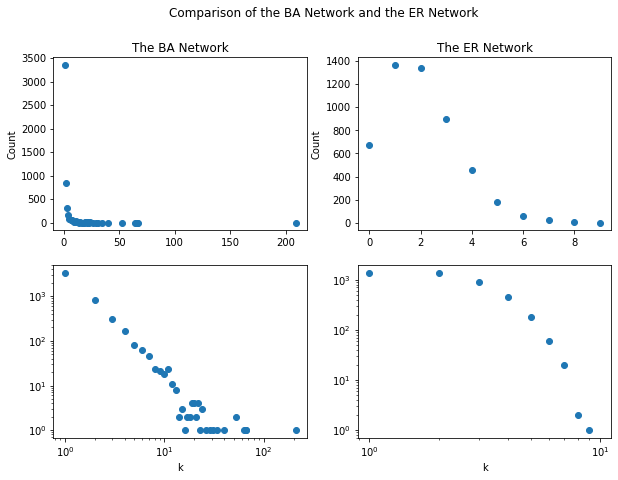

In [56]:
fig = plt.figure(figsize =(10, 7))
fig.suptitle("Comparison of the BA Network and the ER Network")

plt.subplot(2, 2, 1)
plt.title("The BA Network")
plt.scatter(deg, cnt)
plt.ylabel('Count')

plt.subplot(2, 2, 3)
plt.scatter(deg,cnt)
plt.xscale('log')
plt.yscale('log')
plt.xlabel('k')

plt.subplot(2, 2, 2)
plt.title("The ER Network")
plt.scatter(deg_ER, cnt_ER)
plt.ylabel('Count')

plt.subplot(2, 2, 4)
plt.scatter(deg_ER,cnt_ER)
plt.xscale('log')
plt.yscale('log')
plt.xlabel('k')

plt.show()

As mentioned in part 4, the BA network is composed around a few highly "popular" nodes, while the ER network is more even distributed. This is because the BA network model is an algorithm for generating random scale-free networks using a preferential attachment mechanism, i.e. that hold a power-law degree distribution, while ER network model do not exhibit power laws. 